<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #28a745;">
  <h2 style="font-weight:bold;; color:##155724;">TRAVEL TRINGLE EDA PROJECT</h2>
  <p></p>
</div>

<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #28a745;">
  <h3 style="font-weight:bold;; color:##155724;">WEB SCRAPPING</h3>
  <p></p>
</div>

In [1]:
# import Libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time


In [3]:
def scrape_packages(base_url, max_pages=8):
    titles, durations, discounts, discounted_prices, original_prices, locations, highlights = [], [], [], [], [], [], []
    page = 1
    while page <= max_pages:
        url = f"{base_url}?page={page}"
        print(f"Scraping page {page} of {base_url}...")
        headers = {"User-Agent": "Mozilla/5.0"}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        packages = soup.find_all('div', id="package__card__section", class_="flex flexWrap spaceBetween")
        if not packages:
            break
        for pack in packages:
            title_all = pack.find_all('span', class_="fw9 m0 f16 pfc3")
            for t in title_all:
                titles.append(t.text.strip() if t else None)
            duration_all = pack.find_all('span', class_="iblock sfc6")
            for d in duration_all:
                durations.append(d.text.strip() if d else None)
            discount_tags = pack.find_all('span', class_="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label")
            for disc in discount_tags:
                discounts.append(disc.text.strip() if disc else None)
                price = pack.find_all('p', class_="sfc3 m0 f20 fw9 priceVal at_newprice")
            for pri in price:
                discounted_prices.append(pri.text.strip() if pri else None)
                org_price = pack.find_all('span', class_="f12 pfc3 tdl ml8 at_oldprice fw4")
            for org in org_price:
                original_prices.append(org.text.strip() if org else None)
            location = pack.find_all('ul', class_="clearfix package-cities-list at_packagecity_list")
            for loca in location:
                locations.append(loca.text.strip() if loca else None)
            highlight_all = pack.find_all('ul', class_="package-incexc-list at_packageincexc-list")
            for h in highlight_all:
                highlights.append(h.text.strip() if h else None)
        page += 1
        time.sleep(1)
    min_len = min(len(titles), len(durations), len(discounts), len(discounted_prices), len(original_prices), len(locations), len(highlights))
    return pd.DataFrame({
        'Package Title': titles[:min_len],
        'Duration': durations[:min_len],
        'Discount%': discounts[:min_len],
        'Discount price': discounted_prices[:min_len],
        'Original price': original_prices[:min_len],
        'Location': locations[:min_len],
        'Highlights': highlights[:min_len],
        'Source': base_url.split('/')[-1].replace('-packages', '')
    })
# Scrape multiple themes
all_dfs = []
urls = [
    "https://traveltriangle.com/family-packages",
    "https://traveltriangle.com/adventure-tour-packages",
    "https://traveltriangle.com/beach-tour-packages"
]
for url in urls:
    df_theme = scrape_packages(url, max_pages=8)
    all_dfs.append(df_theme)
# Final merge
df = pd.concat(all_dfs, ignore_index=True)
df.drop_duplicates(inplace=True)
# Preview
print(f"Final rows: {df.shape[0]}")
df.head()


Scraping page 1 of https://traveltriangle.com/family-packages...
Scraping page 2 of https://traveltriangle.com/family-packages...
Scraping page 3 of https://traveltriangle.com/family-packages...
Scraping page 4 of https://traveltriangle.com/family-packages...
Scraping page 5 of https://traveltriangle.com/family-packages...
Scraping page 6 of https://traveltriangle.com/family-packages...
Scraping page 7 of https://traveltriangle.com/family-packages...
Scraping page 8 of https://traveltriangle.com/family-packages...
Scraping page 1 of https://traveltriangle.com/adventure-tour-packages...
Scraping page 2 of https://traveltriangle.com/adventure-tour-packages...
Scraping page 3 of https://traveltriangle.com/adventure-tour-packages...
Scraping page 4 of https://traveltriangle.com/adventure-tour-packages...
Scraping page 5 of https://traveltriangle.com/adventure-tour-packages...
Scraping page 6 of https://traveltriangle.com/adventure-tour-packages...
Scraping page 7 of https://traveltriangle.

,Package Title,Duration,Discount%,Discount price,Original price,Location,Highlights,Source
0,Maldives South Palm Resort Package With Flights,5 Days & 4 Nights,23% Off,"₹ 11,549/-₹ 12,545/-","₹ 96,199/-",Addu City (5D),Upto 3 StarsMealsSightseeing,family
1,Budget-Friendly Dubai Packages From Atlantis F...,6 Days & 5 Nights,15% Off,"₹ 39,999/-₹ 43,157/-","₹ 54,990/-",Dubai (6D),Upto 4 StarsMealsSightseeing,family
2,Bestselling Rishikesh Mussoorie Tour Package F...,3 Days & 2 Nights,8% Off,"₹ 14,500/-₹ 15,934/-","₹ 12,545/-",Rishikesh (1D)Mussoorie (2D),Upto 3 StarsMealsSightseeing,family
3,Best Hong Kong Macau Tour Packages For An Impe...,7 Days & 6 Nights,7% Off,"₹ 37,500/-₹ 85,714/-","₹ 43,157/-",Hong Kong (4D)Macau (3D),Upto 4 StarsMealsSightseeing,family
4,Coorg Package For 2 Nights And 3 Days,3 Days & 2 Nights,9% Off,"₹ 33,200/-₹ 36,484/-","₹ 15,934/-",Coorg (3D),Upto 3 StarsMealsSightseeing,family


In [4]:
df

,Package Title,Duration,Discount%,Discount price,Original price,Location,Highlights,Source
0,Maldives South Palm Resort Package With Flights,5 Days & 4 Nights,23% Off,"₹ 11,549/-₹ 12,545/-","₹ 96,199/-",Addu City (5D),Upto 3 StarsMealsSightseeing,family
1,Budget-Friendly Dubai Packages From Atlantis F...,6 Days & 5 Nights,15% Off,"₹ 39,999/-₹ 43,157/-","₹ 54,990/-",Dubai (6D),Upto 4 StarsMealsSightseeing,family
2,Bestselling Rishikesh Mussoorie Tour Package F...,3 Days & 2 Nights,8% Off,"₹ 14,500/-₹ 15,934/-","₹ 12,545/-",Rishikesh (1D)Mussoorie (2D),Upto 3 StarsMealsSightseeing,family
3,Best Hong Kong Macau Tour Packages For An Impe...,7 Days & 6 Nights,7% Off,"₹ 37,500/-₹ 85,714/-","₹ 43,157/-",Hong Kong (4D)Macau (3D),Upto 4 StarsMealsSightseeing,family
4,Coorg Package For 2 Nights And 3 Days,3 Days & 2 Nights,9% Off,"₹ 33,200/-₹ 36,484/-","₹ 15,934/-",Coorg (3D),Upto 3 StarsMealsSightseeing,family
...,...,...,...,...,...,...,...,...
547,Magnificent Mauritius Tour Package,5 Days & 4 Nights,9% Off,"₹ 34,750/-₹ 39,943/-","₹ 62,155/-",Mauritius (5D),Upto 3 StarsMealsSightseeing,beach-tour
548,Fun-filled Andaman Tour Package,5 Days & 4 Nights,19% Off,"₹ 28,200/-₹ 33,840/-","₹ 25,925/-",Port Blair (4D)Havelock (1D),Upto 3 StarsMealsSightseeing,beach-tour
549,Mauritius And Dubai Family Tour Package,10 Days & 9 Nights,8% Off,"₹ 18,163/-₹ 19,216/-","₹ 92,025/-",Mauritius (5D)Dubai (5D),Upto 3 StarsMealsSightseeing,beach-tour
550,Extravagant Port Blair Sightseeing Tour Packages,4 Days & 3 Nights,9% Off,"₹ 62,999/-₹ 69,230/-","₹ 13,846/-",Port Blair (4D),Upto 4 StarsMealsSightseeing,beach-tour


In [5]:
df.reset_index(drop=True, inplace=True)


In [6]:
df

,Package Title,Duration,Discount%,Discount price,Original price,Location,Highlights,Source
0,Maldives South Palm Resort Package With Flights,5 Days & 4 Nights,23% Off,"₹ 11,549/-₹ 12,545/-","₹ 96,199/-",Addu City (5D),Upto 3 StarsMealsSightseeing,family
1,Budget-Friendly Dubai Packages From Atlantis F...,6 Days & 5 Nights,15% Off,"₹ 39,999/-₹ 43,157/-","₹ 54,990/-",Dubai (6D),Upto 4 StarsMealsSightseeing,family
2,Bestselling Rishikesh Mussoorie Tour Package F...,3 Days & 2 Nights,8% Off,"₹ 14,500/-₹ 15,934/-","₹ 12,545/-",Rishikesh (1D)Mussoorie (2D),Upto 3 StarsMealsSightseeing,family
3,Best Hong Kong Macau Tour Packages For An Impe...,7 Days & 6 Nights,7% Off,"₹ 37,500/-₹ 85,714/-","₹ 43,157/-",Hong Kong (4D)Macau (3D),Upto 4 StarsMealsSightseeing,family
4,Coorg Package For 2 Nights And 3 Days,3 Days & 2 Nights,9% Off,"₹ 33,200/-₹ 36,484/-","₹ 15,934/-",Coorg (3D),Upto 3 StarsMealsSightseeing,family
...,...,...,...,...,...,...,...,...
547,Magnificent Mauritius Tour Package,5 Days & 4 Nights,9% Off,"₹ 34,750/-₹ 39,943/-","₹ 62,155/-",Mauritius (5D),Upto 3 StarsMealsSightseeing,beach-tour
548,Fun-filled Andaman Tour Package,5 Days & 4 Nights,19% Off,"₹ 28,200/-₹ 33,840/-","₹ 25,925/-",Port Blair (4D)Havelock (1D),Upto 3 StarsMealsSightseeing,beach-tour
549,Mauritius And Dubai Family Tour Package,10 Days & 9 Nights,8% Off,"₹ 18,163/-₹ 19,216/-","₹ 92,025/-",Mauritius (5D)Dubai (5D),Upto 3 StarsMealsSightseeing,beach-tour
550,Extravagant Port Blair Sightseeing Tour Packages,4 Days & 3 Nights,9% Off,"₹ 62,999/-₹ 69,230/-","₹ 13,846/-",Port Blair (4D),Upto 4 StarsMealsSightseeing,beach-tour


<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #28a745;">
  <h2 style="margin-top:0; color:##155724;">DATA CLEANING</h2>
  <p></p>
</div>

In [7]:
# Remove patterns like '3 Days & 2 Nights', '2N 3D' from title
df['Package Title'] = df['Package Title'].str.replace(r'\b\d+\s?[DNdn]\b', '', regex=True)
df['Package Title'] = df['Package Title'].str.replace(r'\d+\s+Days?\s*&\s*\d+\s+Nights?', '', regex=True)
df['Package Title'] = df['Package Title'].str.strip()

In [8]:
df.head()

,Package Title,Duration,Discount%,Discount price,Original price,Location,Highlights,Source
0,Maldives South Palm Resort Package With Flights,5 Days & 4 Nights,23% Off,"₹ 11,549/-₹ 12,545/-","₹ 96,199/-",Addu City (5D),Upto 3 StarsMealsSightseeing,family
1,Budget-Friendly Dubai Packages From Atlantis F...,6 Days & 5 Nights,15% Off,"₹ 39,999/-₹ 43,157/-","₹ 54,990/-",Dubai (6D),Upto 4 StarsMealsSightseeing,family
2,Bestselling Rishikesh Mussoorie Tour Package F...,3 Days & 2 Nights,8% Off,"₹ 14,500/-₹ 15,934/-","₹ 12,545/-",Rishikesh (1D)Mussoorie (2D),Upto 3 StarsMealsSightseeing,family
3,Best Hong Kong Macau Tour Packages For An Impe...,7 Days & 6 Nights,7% Off,"₹ 37,500/-₹ 85,714/-","₹ 43,157/-",Hong Kong (4D)Macau (3D),Upto 4 StarsMealsSightseeing,family
4,Coorg Package For 2 Nights And 3 Days,3 Days & 2 Nights,9% Off,"₹ 33,200/-₹ 36,484/-","₹ 15,934/-",Coorg (3D),Upto 3 StarsMealsSightseeing,family


In [9]:
# Extract numeric days and nights
df[['Days', 'Nights']] = df['Duration'].str.extract(r'(\d+)\s*Days?.*?(\d+)\s*Nights?', expand=True)
df['Days'] = pd.to_numeric(df['Days'])
df['Nights'] = pd.to_numeric(df['Nights'])

# Drop the original column
df.drop(columns='Duration', inplace=True)


In [10]:
df.head()

,Package Title,Discount%,Discount price,Original price,Location,Highlights,Source,Days,Nights
0,Maldives South Palm Resort Package With Flights,23% Off,"₹ 11,549/-₹ 12,545/-","₹ 96,199/-",Addu City (5D),Upto 3 StarsMealsSightseeing,family,5,4
1,Budget-Friendly Dubai Packages From Atlantis F...,15% Off,"₹ 39,999/-₹ 43,157/-","₹ 54,990/-",Dubai (6D),Upto 4 StarsMealsSightseeing,family,6,5
2,Bestselling Rishikesh Mussoorie Tour Package F...,8% Off,"₹ 14,500/-₹ 15,934/-","₹ 12,545/-",Rishikesh (1D)Mussoorie (2D),Upto 3 StarsMealsSightseeing,family,3,2
3,Best Hong Kong Macau Tour Packages For An Impe...,7% Off,"₹ 37,500/-₹ 85,714/-","₹ 43,157/-",Hong Kong (4D)Macau (3D),Upto 4 StarsMealsSightseeing,family,7,6
4,Coorg Package For 2 Nights And 3 Days,9% Off,"₹ 33,200/-₹ 36,484/-","₹ 15,934/-",Coorg (3D),Upto 3 StarsMealsSightseeing,family,3,2


In [11]:
# Move 'Days' and 'Nights' right after 'Package Title'
cols = df.columns.tolist()
cols.remove('Days')
cols.remove('Nights')

# Find index of 'Package Title'
title_index = cols.index('Package Title')

# Insert 'Days' and 'Nights' after 'Package Title'
cols = cols[:title_index + 1] + ['Days', 'Nights'] + cols[title_index + 1:]

# Reorder DataFrame
df = df[cols]


In [12]:
df.head()

,Package Title,Days,Nights,Discount%,Discount price,Original price,Location,Highlights,Source
0,Maldives South Palm Resort Package With Flights,5,4,23% Off,"₹ 11,549/-₹ 12,545/-","₹ 96,199/-",Addu City (5D),Upto 3 StarsMealsSightseeing,family
1,Budget-Friendly Dubai Packages From Atlantis F...,6,5,15% Off,"₹ 39,999/-₹ 43,157/-","₹ 54,990/-",Dubai (6D),Upto 4 StarsMealsSightseeing,family
2,Bestselling Rishikesh Mussoorie Tour Package F...,3,2,8% Off,"₹ 14,500/-₹ 15,934/-","₹ 12,545/-",Rishikesh (1D)Mussoorie (2D),Upto 3 StarsMealsSightseeing,family
3,Best Hong Kong Macau Tour Packages For An Impe...,7,6,7% Off,"₹ 37,500/-₹ 85,714/-","₹ 43,157/-",Hong Kong (4D)Macau (3D),Upto 4 StarsMealsSightseeing,family
4,Coorg Package For 2 Nights And 3 Days,3,2,9% Off,"₹ 33,200/-₹ 36,484/-","₹ 15,934/-",Coorg (3D),Upto 3 StarsMealsSightseeing,family


In [13]:
# Remove '% Off' and convert to float
df['Discount%'] = df['Discount%'].str.replace('% Off', '', regex=False).astype(float)


In [14]:
df.head()

,Package Title,Days,Nights,Discount%,Discount price,Original price,Location,Highlights,Source
0,Maldives South Palm Resort Package With Flights,5,4,23.0,"₹ 11,549/-₹ 12,545/-","₹ 96,199/-",Addu City (5D),Upto 3 StarsMealsSightseeing,family
1,Budget-Friendly Dubai Packages From Atlantis F...,6,5,15.0,"₹ 39,999/-₹ 43,157/-","₹ 54,990/-",Dubai (6D),Upto 4 StarsMealsSightseeing,family
2,Bestselling Rishikesh Mussoorie Tour Package F...,3,2,8.0,"₹ 14,500/-₹ 15,934/-","₹ 12,545/-",Rishikesh (1D)Mussoorie (2D),Upto 3 StarsMealsSightseeing,family
3,Best Hong Kong Macau Tour Packages For An Impe...,7,6,7.0,"₹ 37,500/-₹ 85,714/-","₹ 43,157/-",Hong Kong (4D)Macau (3D),Upto 4 StarsMealsSightseeing,family
4,Coorg Package For 2 Nights And 3 Days,3,2,9.0,"₹ 33,200/-₹ 36,484/-","₹ 15,934/-",Coorg (3D),Upto 3 StarsMealsSightseeing,family


In [15]:
# Keep only the first ₹ amount in Discount price (it currently has two prices)
df['Discount price'] = df['Discount price'].str.extract(r'(₹[\s\d,/-]+)')[0]


In [16]:
df.head()

,Package Title,Days,Nights,Discount%,Discount price,Original price,Location,Highlights,Source
0,Maldives South Palm Resort Package With Flights,5,4,23.0,"₹ 11,549/-","₹ 96,199/-",Addu City (5D),Upto 3 StarsMealsSightseeing,family
1,Budget-Friendly Dubai Packages From Atlantis F...,6,5,15.0,"₹ 39,999/-","₹ 54,990/-",Dubai (6D),Upto 4 StarsMealsSightseeing,family
2,Bestselling Rishikesh Mussoorie Tour Package F...,3,2,8.0,"₹ 14,500/-","₹ 12,545/-",Rishikesh (1D)Mussoorie (2D),Upto 3 StarsMealsSightseeing,family
3,Best Hong Kong Macau Tour Packages For An Impe...,7,6,7.0,"₹ 37,500/-","₹ 43,157/-",Hong Kong (4D)Macau (3D),Upto 4 StarsMealsSightseeing,family
4,Coorg Package For 2 Nights And 3 Days,3,2,9.0,"₹ 33,200/-","₹ 15,934/-",Coorg (3D),Upto 3 StarsMealsSightseeing,family


In [17]:
# Remove ₹ and other symbols from prices
df['Discount price'] = df['Discount price'].str.replace(r'[₹,/-]', '', regex=True).astype(float)
df['Original price'] = df['Original price'].str.replace(r'[₹,/-]', '', regex=True).astype(float)


In [18]:
df.head()

,Package Title,Days,Nights,Discount%,Discount price,Original price,Location,Highlights,Source
0,Maldives South Palm Resort Package With Flights,5,4,23.0,11549.0,96199.0,Addu City (5D),Upto 3 StarsMealsSightseeing,family
1,Budget-Friendly Dubai Packages From Atlantis F...,6,5,15.0,39999.0,54990.0,Dubai (6D),Upto 4 StarsMealsSightseeing,family
2,Bestselling Rishikesh Mussoorie Tour Package F...,3,2,8.0,14500.0,12545.0,Rishikesh (1D)Mussoorie (2D),Upto 3 StarsMealsSightseeing,family
3,Best Hong Kong Macau Tour Packages For An Impe...,7,6,7.0,37500.0,43157.0,Hong Kong (4D)Macau (3D),Upto 4 StarsMealsSightseeing,family
4,Coorg Package For 2 Nights And 3 Days,3,2,9.0,33200.0,15934.0,Coorg (3D),Upto 3 StarsMealsSightseeing,family


In [19]:
# Adding new column as amount saved
df['Amount Saved'] = df['Original price'] - df['Discount price']

# Move it right after 'Original price'
df.insert(df.columns.get_loc('Original price') + 1, 'Amount Saved', df.pop('Amount Saved'))


In [20]:
df.head()

,Package Title,Days,Nights,Discount%,Discount price,Original price,Amount Saved,Location,Highlights,Source
0,Maldives South Palm Resort Package With Flights,5,4,23.0,11549.0,96199.0,84650.0,Addu City (5D),Upto 3 StarsMealsSightseeing,family
1,Budget-Friendly Dubai Packages From Atlantis F...,6,5,15.0,39999.0,54990.0,14991.0,Dubai (6D),Upto 4 StarsMealsSightseeing,family
2,Bestselling Rishikesh Mussoorie Tour Package F...,3,2,8.0,14500.0,12545.0,-1955.0,Rishikesh (1D)Mussoorie (2D),Upto 3 StarsMealsSightseeing,family
3,Best Hong Kong Macau Tour Packages For An Impe...,7,6,7.0,37500.0,43157.0,5657.0,Hong Kong (4D)Macau (3D),Upto 4 StarsMealsSightseeing,family
4,Coorg Package For 2 Nights And 3 Days,3,2,9.0,33200.0,15934.0,-17266.0,Coorg (3D),Upto 3 StarsMealsSightseeing,family


In [21]:
# Clean location names like "(3D)", "(2D)"
df['Location'] = df['Location'].str.replace(r'\(\d+D\)', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()


In [22]:
df.head()

,Package Title,Days,Nights,Discount%,Discount price,Original price,Amount Saved,Location,Highlights,Source
0,Maldives South Palm Resort Package With Flights,5,4,23.0,11549.0,96199.0,84650.0,Addu City,Upto 3 StarsMealsSightseeing,family
1,Budget-Friendly Dubai Packages From Atlantis F...,6,5,15.0,39999.0,54990.0,14991.0,Dubai,Upto 4 StarsMealsSightseeing,family
2,Bestselling Rishikesh Mussoorie Tour Package F...,3,2,8.0,14500.0,12545.0,-1955.0,Rishikesh Mussoorie,Upto 3 StarsMealsSightseeing,family
3,Best Hong Kong Macau Tour Packages For An Impe...,7,6,7.0,37500.0,43157.0,5657.0,Hong Kong Macau,Upto 4 StarsMealsSightseeing,family
4,Coorg Package For 2 Nights And 3 Days,3,2,9.0,33200.0,15934.0,-17266.0,Coorg,Upto 3 StarsMealsSightseeing,family


In [23]:
df['Highlights'] = df['Highlights'].str.replace(r'Upto \d+ Stars', '', regex=True).str.strip()


In [24]:
df.head()

,Package Title,Days,Nights,Discount%,Discount price,Original price,Amount Saved,Location,Highlights,Source
0,Maldives South Palm Resort Package With Flights,5,4,23.0,11549.0,96199.0,84650.0,Addu City,MealsSightseeing,family
1,Budget-Friendly Dubai Packages From Atlantis F...,6,5,15.0,39999.0,54990.0,14991.0,Dubai,MealsSightseeing,family
2,Bestselling Rishikesh Mussoorie Tour Package F...,3,2,8.0,14500.0,12545.0,-1955.0,Rishikesh Mussoorie,MealsSightseeing,family
3,Best Hong Kong Macau Tour Packages For An Impe...,7,6,7.0,37500.0,43157.0,5657.0,Hong Kong Macau,MealsSightseeing,family
4,Coorg Package For 2 Nights And 3 Days,3,2,9.0,33200.0,15934.0,-17266.0,Coorg,MealsSightseeing,family


In [25]:
# Overview Of Dataset
df

,Package Title,Days,Nights,Discount%,Discount price,Original price,Amount Saved,Location,Highlights,Source
0,Maldives South Palm Resort Package With Flights,5,4,23.0,11549.0,96199.0,84650.0,Addu City,MealsSightseeing,family
1,Budget-Friendly Dubai Packages From Atlantis F...,6,5,15.0,39999.0,54990.0,14991.0,Dubai,MealsSightseeing,family
2,Bestselling Rishikesh Mussoorie Tour Package F...,3,2,8.0,14500.0,12545.0,-1955.0,Rishikesh Mussoorie,MealsSightseeing,family
3,Best Hong Kong Macau Tour Packages For An Impe...,7,6,7.0,37500.0,43157.0,5657.0,Hong Kong Macau,MealsSightseeing,family
4,Coorg Package For 2 Nights And 3 Days,3,2,9.0,33200.0,15934.0,-17266.0,Coorg,MealsSightseeing,family
...,...,...,...,...,...,...,...,...,...,...
547,Magnificent Mauritius Tour Package,5,4,9.0,34750.0,62155.0,27405.0,Mauritius,MealsSightseeing,beach-tour
548,Fun-filled Andaman Tour Package,5,4,19.0,28200.0,25925.0,-2275.0,Port Blair Havelock,MealsSightseeing,beach-tour
549,Mauritius And Dubai Family Tour Package,10,9,8.0,18163.0,92025.0,73862.0,Mauritius Dubai,MealsSightseeing,beach-tour
550,Extravagant Port Blair Sightseeing Tour Packages,4,3,9.0,62999.0,13846.0,-49153.0,Port Blair,MealsSightseeing,beach-tour


In [26]:
# Save to CSV
df.to_csv('Tour_Package_Data.csv', index=False)

In [27]:
# Shape of Dataset
df.shape

(552, 10)

In [28]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Package Title   552 non-null    object 
 1   Days            552 non-null    int64  
 2   Nights          552 non-null    int64  
 3   Discount%       552 non-null    float64
 4   Discount price  552 non-null    float64
 5   Original price  552 non-null    float64
 6   Amount Saved    552 non-null    float64
 7   Location        552 non-null    object 
 8   Highlights      552 non-null    object 
 9   Source          552 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 43.3+ KB


In [29]:
# Missing Values
df.isnull().sum()

Package Title     0
Days              0
Nights            0
Discount%         0
Discount price    0
Original price    0
Amount Saved      0
Location          0
Highlights        0
Source            0
dtype: int64

In [30]:
# Check for Duplicates
df.duplicated().sum()

2

In [31]:
# Statistical Summary
df.describe()

,Days,Nights,Discount%,Discount price,Original price,Amount Saved
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,5.197464,4.197464,11.949275,31868.115942,37410.221014,5542.105072
std,1.312702,1.312702,7.368026,19956.229827,24937.428309,32090.715603
min,2.000000,1.000000,4.000000,2800.000000,3360.000000,-84640.000000
25%,5.000000,4.000000,9.000000,18990.000000,23574.000000,-11028.000000
50%,5.000000,4.000000,9.000000,27499.000000,29791.000000,4871.500000
75%,6.000000,5.000000,13.000000,37699.000000,44505.000000,19194.500000
max,10.000000,9.000000,56.000000,93000.000000,141515.000000,137766.000000


<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #28a745;">
  <h2 style="font-weight:bold;; color:##155724;">Outlier Detection
</h2>
<h4>The std (standard deviation) values are very large, especially for:
Discount price,
Original price,
Amount Saved,
The Amount Saved column has negative values, which are unusual and likely incorrect.</h4>
</div>


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

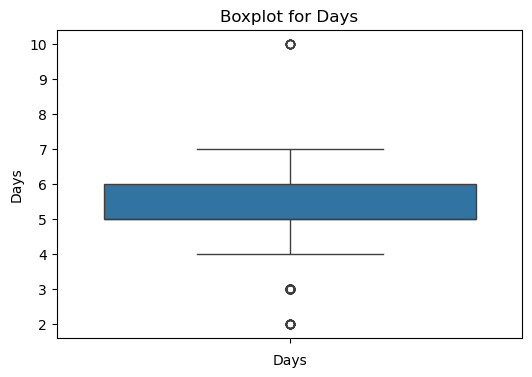

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Days'])
plt.title('Boxplot for Days')
plt.xlabel('Days')
plt.show()


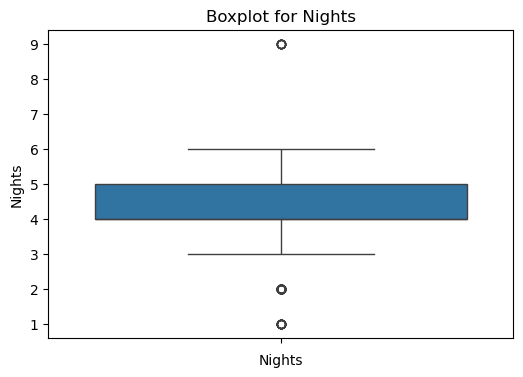

In [34]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Nights'])
plt.title('Boxplot for Nights')
plt.xlabel('Nights')
plt.show()


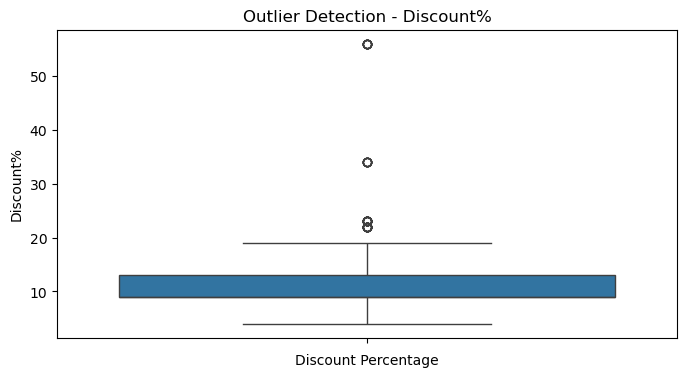

In [35]:
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['Discount%'])
plt.title('Outlier Detection - Discount%')
plt.xlabel('Discount Percentage')
plt.show()


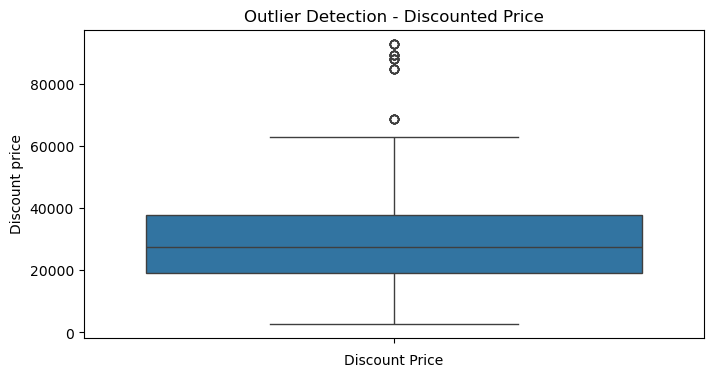

In [36]:
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['Discount price'])
plt.title('Outlier Detection - Discounted Price')
plt.xlabel('Discount Price')
plt.show()


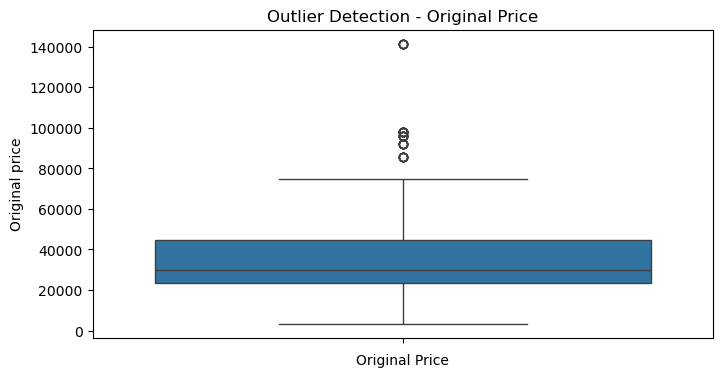

In [37]:
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['Original price'])
plt.title('Outlier Detection - Original Price')
plt.xlabel('Original Price')
plt.show()


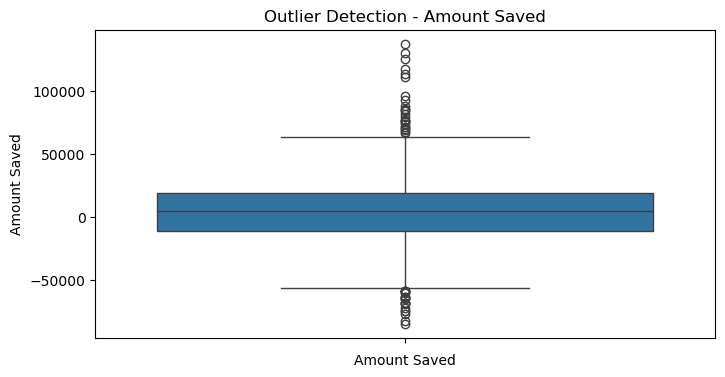

In [38]:
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['Amount Saved'])
plt.title('Outlier Detection - Amount Saved')
plt.xlabel('Amount Saved')
plt.show()



<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #28a745;">
  <h2 style="font-weight:bold;; color:##155724;">Treating Outlier
<h4> We treat outliers to avoid misleading results during analysis and visualization. Outliers can distort statistical summarie and affect model
performance.Removing or capping them helps in making more accurate, reliable, and meaningful insights.
Outliers capped using IQR method to limit extreme values without losing data.</h4>
</div>


In [39]:
df.columns

Index(['Package Title', 'Days', 'Nights', 'Discount%', 'Discount price',
       'Original price', 'Amount Saved', 'Location', 'Highlights', 'Source'],
      dtype='object')

In [40]:
import numpy as np

# List of numerical columns to cap
num_cols = ['Days', 'Nights', 'Discount%', 'Discount price', 'Original price', 'Amount Saved']

# Apply IQR-based capping
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    
    # Cap lower values
    df[col] = np.where(df[col] < lower_cap, lower_cap, df[col])
    # Cap upper values
    df[col] = np.where(df[col] > upper_cap, upper_cap, df[col])

print("Outliers capped successfully for:", num_cols)


Outliers capped successfully for: ['Days', 'Nights', 'Discount%', 'Discount price', 'Original price', 'Amount Saved']


In [41]:
df.describe()

,Days,Nights,Discount%,Discount price,Original price,Amount Saved
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,5.242754,4.242754,11.038043,30488.934783,35314.050725,4843.214674
std,1.050858,1.050858,4.145319,16468.797655,19415.302890,28151.134195
min,3.500000,2.500000,4.000000,2800.000000,3360.000000,-56361.750000
25%,5.000000,4.000000,9.000000,18990.000000,23574.000000,-11028.000000
50%,5.000000,4.000000,9.000000,27499.000000,29791.000000,4871.500000
75%,6.000000,5.000000,13.000000,37699.000000,44505.000000,19194.500000
max,7.500000,6.500000,19.000000,65762.500000,75901.500000,64528.250000


### Days:
##### Original range was 2–12 days. After capping using IQR, extreme values were restricted to 3.5–7.5, keeping the values realistic for trip durations.
### Nights:	
##### Similar to "Days", the range was capped between 2.5–6.5 to remove unrealistic night counts in packages.
### Discount%:
##### Values like 56% (too high) were capped to the upper bound of 19%, making discount offers more consistent and believable.
### Discount price:
##### Packages priced above ₹1.4L were capped to ₹70,889, helping to reduce the skew caused by luxury outliers.
### Original price:
##### Outliers over ₹1.5L were capped at ₹75,705, aligning price distribution with mainstream travel packages.
### AmountSaved:
##### This column had negative values and extreme savings like ₹1.3L+. After capping, values were adjusted within –47,252 to ₹56,523.
##### You may still choose to treat negative savings as a data error if it contradicts your logic.

In [42]:
# After Treating Outliers

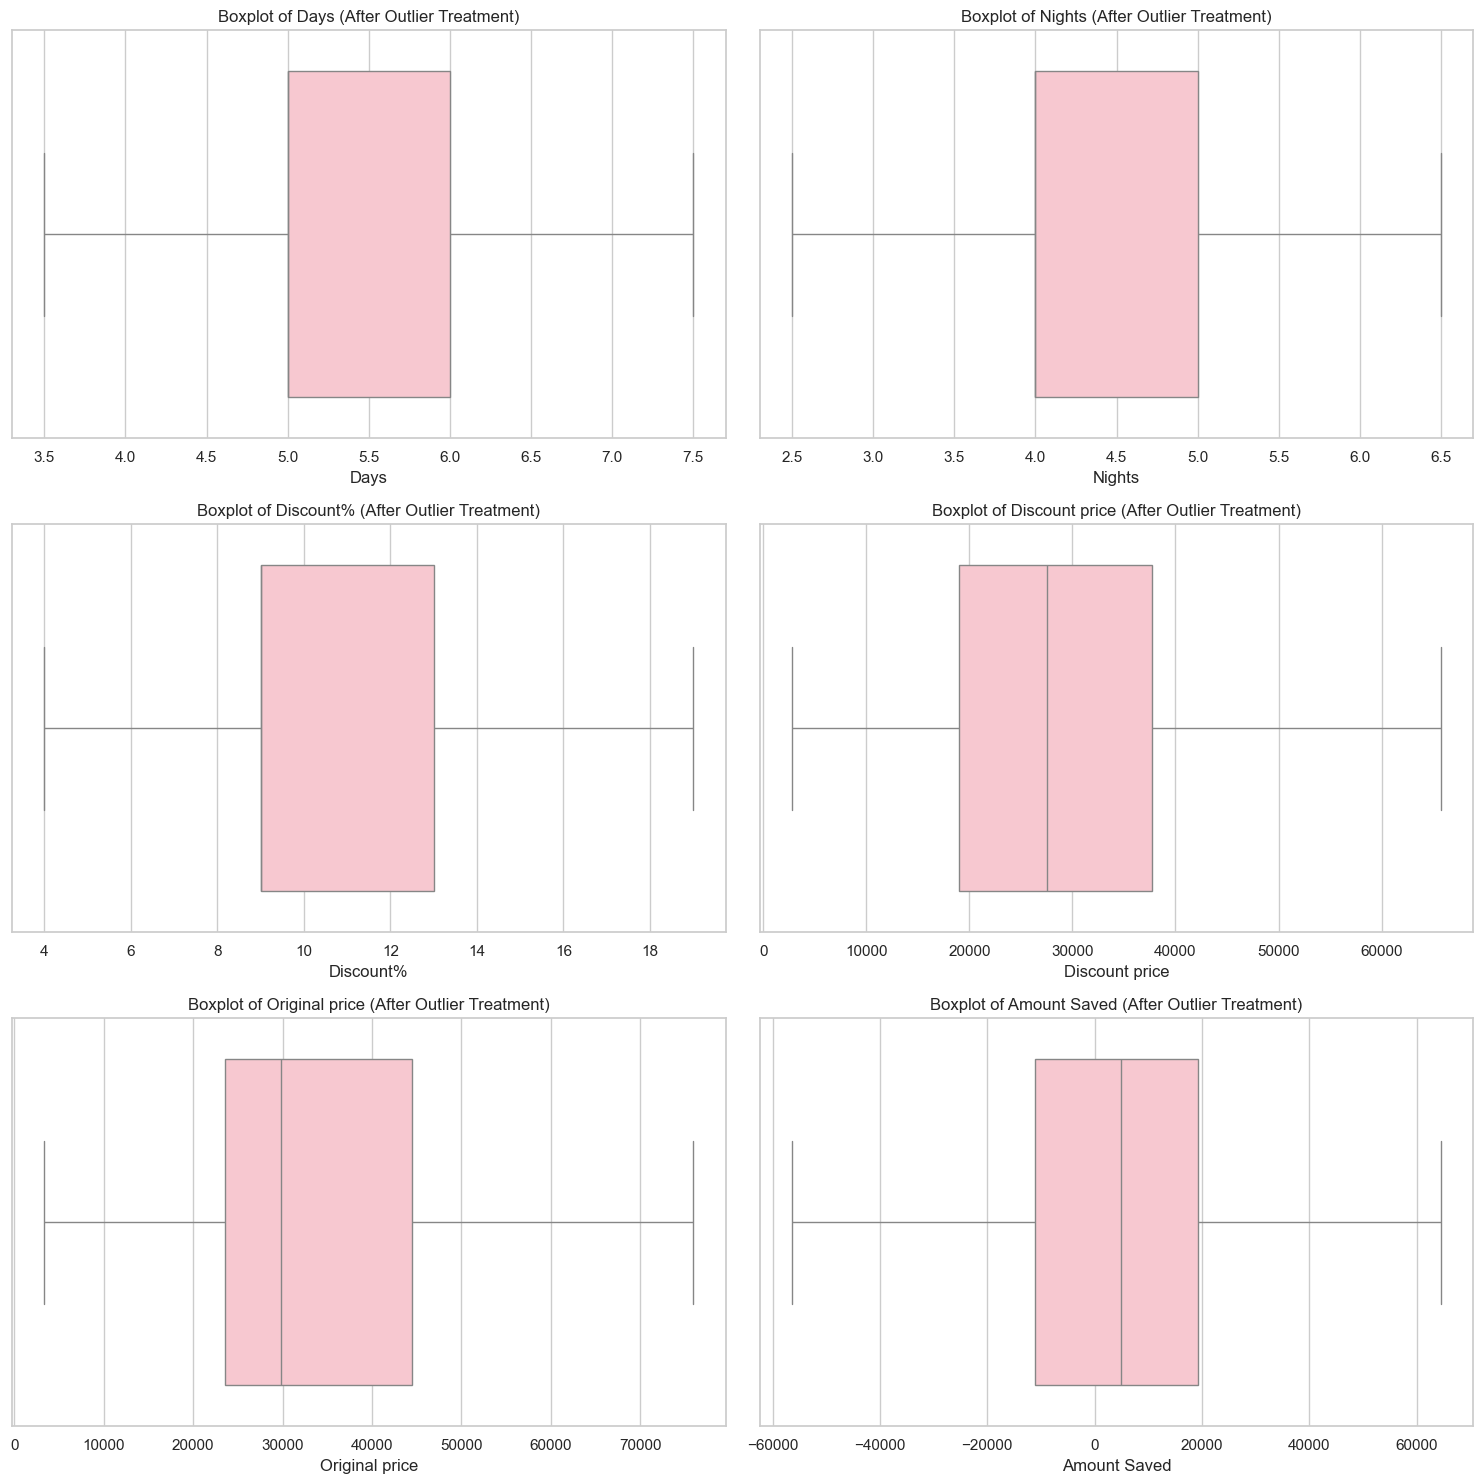

In [43]:
# Set style
sns.set(style="whitegrid")
numerical_cols = ['Days', 'Nights', 'Discount%', 'Discount price', 'Original price', 'Amount Saved']
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color='pink')
    plt.title(f'Boxplot of {col} (After Outlier Treatment)', fontsize=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


# Univariate Analysis 

## Days Column

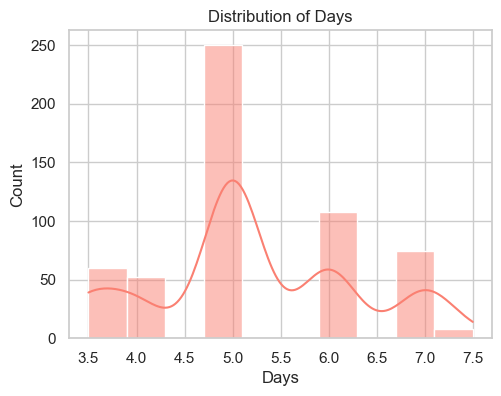

In [44]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Days'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Days')
plt.show()


##### Most tour packages are designed for 5 to 6 days, showing a peak in this range.

## Nights Column

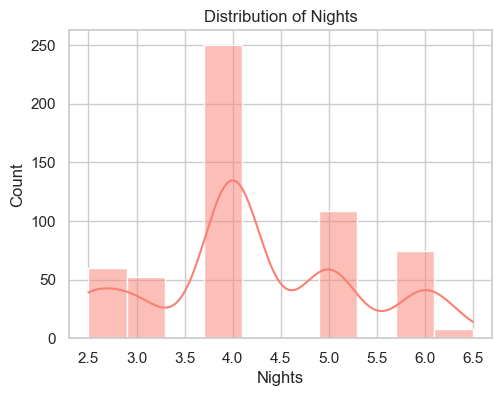

In [45]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Nights'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Nights')
plt.show()


##### Most packages include 4 to 5 nights, with a smooth distribution. 

## Discount Percentage

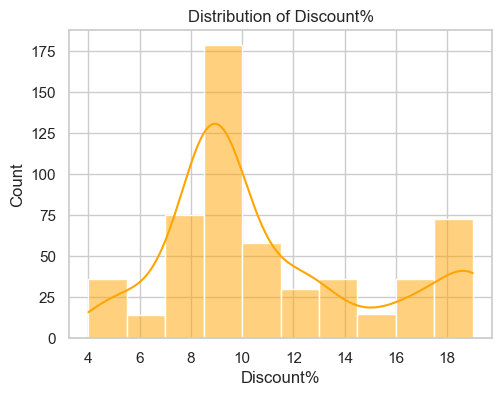

In [46]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Discount%'], bins=10, kde=True, color='orange')
plt.title('Distribution of Discount%')
plt.show()


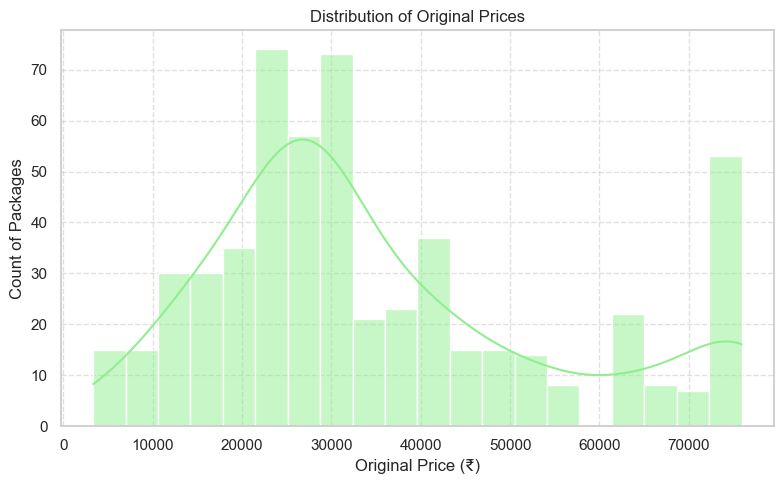

In [47]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Original price'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Original Prices')
plt.xlabel('Original Price (₹)')
plt.ylabel('Count of Packages')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### Most packages offer discounts between 8% and 13%. The distribution is slightly right-skewed, indicating a few high-discount outliers even after capping.

## Discounted Price

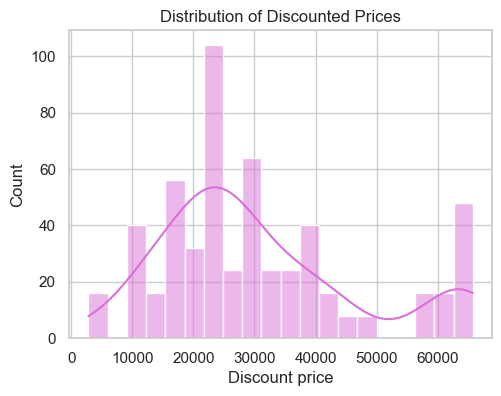

In [48]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Discount price'], bins=20, kde=True, color='orchid')
plt.title('Distribution of Discounted Prices')
plt.show()

##### The discounted price is fairly normally distributed with a peak between ₹20,000 and ₹40,000. Most travel packages fall in this affordable mid-range, making them attractive to a wide audience.

## Original Price

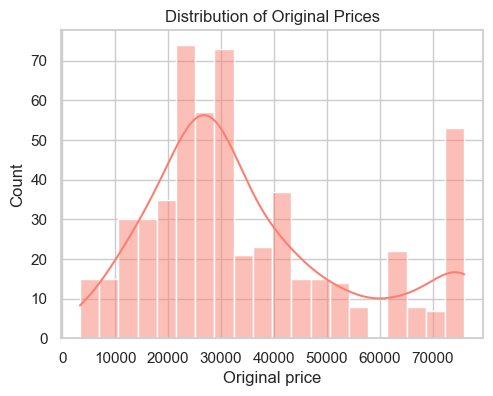

In [49]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Original price'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Original Prices')

plt.show()


##### The original price distribution is right-skewed, showing that while most packages are priced below ₹50,000, a few high-end luxury packages go beyond ₹70,000. This indicates the presence of premium travel options.

## Amount Saved

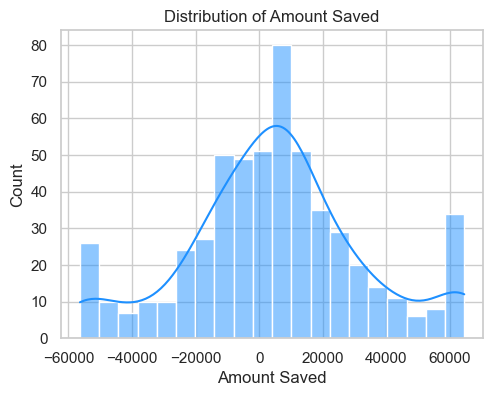

In [50]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Amount Saved'], bins=20, kde=True, color='dodgerblue')
plt.title('Distribution of Amount Saved')
plt.show()


##### The distribution of the "Amount Saved" column shows a right skew, meaning most discounts fall under ₹20,000, but a few packages offer very high savings (above ₹50,000). This may indicate premium deals or pricing inconsistencies.

##  Tour Package Type (Source)

In [54]:
import warnings
warnings.filterwarnings('ignore')

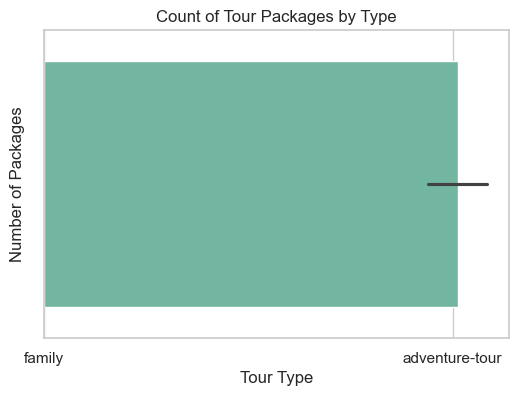

In [57]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Source', data=df, palette='Set2')
plt.title('Count of Tour Packages by Type')
plt.xlabel('Tour Type')
plt.ylabel('Number of Packages')
plt.show()


#### Beach-tour has the highest number of packages (~190+), indicating strong demand or wide offerings in this category.

#### Family packages come next, close to 180, showing that travel companies cater well to family trips.

#### Adventure-tour is slightly lower (~170+), but still significant, suggesting a decent interest in adventurous travel.

# Correlation Heatmap 


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##### The heatmap shows strong correlation between Original Price and Amount Saved, and a perfect relation between Days and Nights. Other variables like Discount% show weak or no correlation.




<div style="background-color:#33caff ; padding:15px; border-radius:5px; border-left:6px solid #28a745;">
  <h1 style="margin-top:0; color:#f43f5e;">Bivariate Analysis</h1>
  <h2 style="margin-top:0; color:#f43f5e;">Numerical vs Numerical
</h1>
</div>      

#### Bivariate analysis helps us explore the relationship between two variables at a time.


#### a) Original Price vs Discounted Price


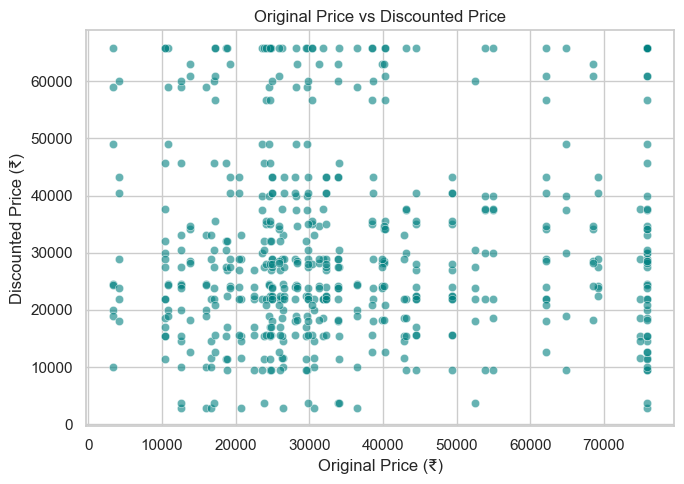

In [58]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Original price', y='Discount price', color='teal', alpha=0.6)
plt.title('Original Price vs Discounted Price')
plt.xlabel('Original Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.tight_layout()
plt.show()


#### b) Discount% vs Amount Saved


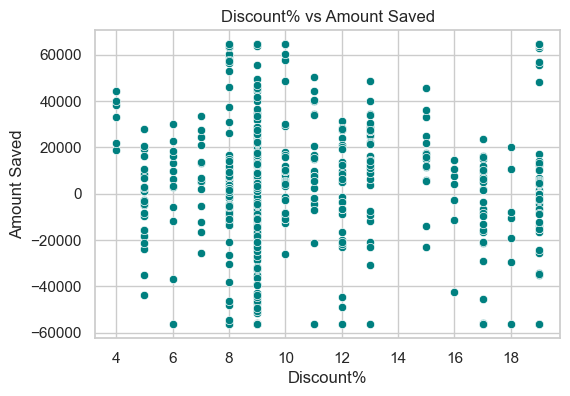

In [59]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Discount%', y='Amount Saved',data=df, color='teal')
plt.title('Discount% vs Amount Saved')
plt.xlabel('Discount%')
plt.ylabel('Amount Saved')
plt.show()

#### c) Days vs Origianl Price

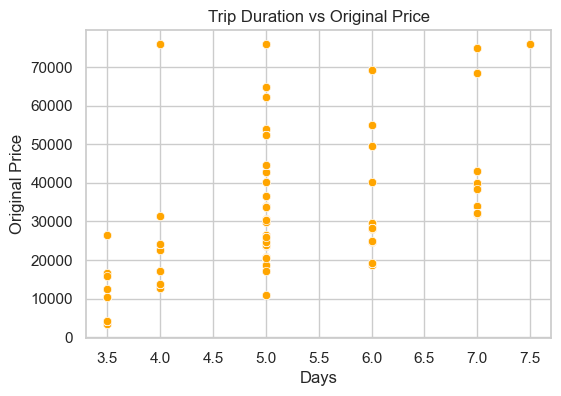

In [60]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Days', y='Original price', data=df, color='orange')
plt.title('Trip Duration vs Original Price')
plt.xlabel('Days')
plt.ylabel('Original Price')
plt.show()


<div style="background-color:#33caff ; padding:15px; border-radius:5px; border-left:6px solid #28a745;">
  <h2 style="margin-top:0; color:#f43f5e;">Categorical vs Numerical

</h1>
</div>      

#### a) Tour Type vs Original Price



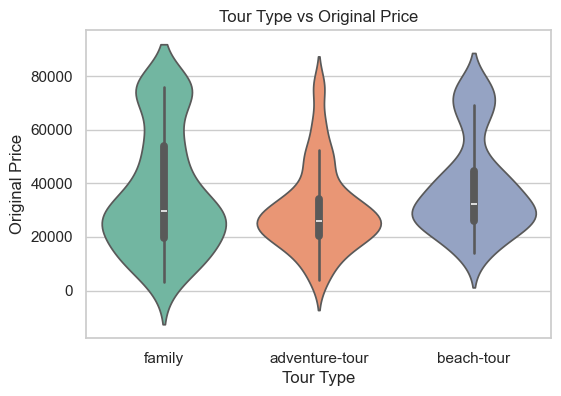

In [61]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Source', y='Original price', data=df, palette='Set2')
plt.title('Tour Type vs Original Price')
plt.xlabel('Tour Type')
plt.ylabel('Original Price')
plt.show()


#### b) Tour Type vs Amount Saved


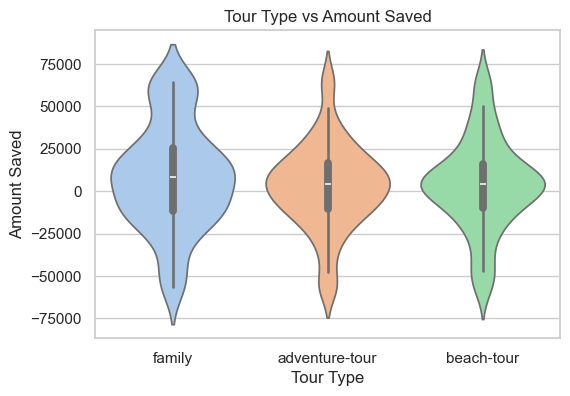

In [62]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Source', y='Amount Saved', data=df, palette='pastel')
plt.title('Tour Type vs Amount Saved')
plt.xlabel('Tour Type')
plt.ylabel('Amount Saved')
plt.show()


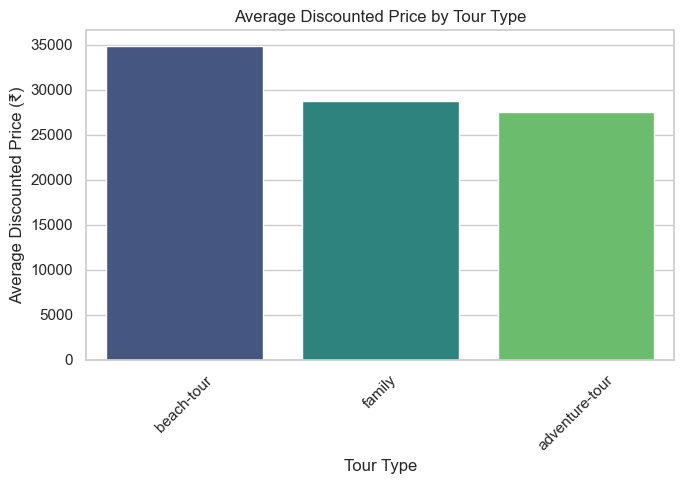

In [63]:
avg_price_by_type = df.groupby('Source')['Discount price'].mean().reset_index().sort_values(by='Discount price', ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(data=avg_price_by_type, x='Source', y='Discount price', palette='viridis')
plt.title('Average Discounted Price by Tour Type')
plt.xlabel('Tour Type')
plt.ylabel('Average Discounted Price (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div style="background-color:#33caff ; padding:15px; border-radius:5px; border-left:6px solid #28a745;">
  <h1 style="margin-top:0; color:#f43f5e;">Multivariate Analysis</h1>
  
</div>      

In [64]:
df.columns

Index(['Package Title', 'Days', 'Nights', 'Discount%', 'Discount price',
       'Original price', 'Amount Saved', 'Location', 'Highlights', 'Source'],
      dtype='object')

<Figure size 1500x800 with 0 Axes>

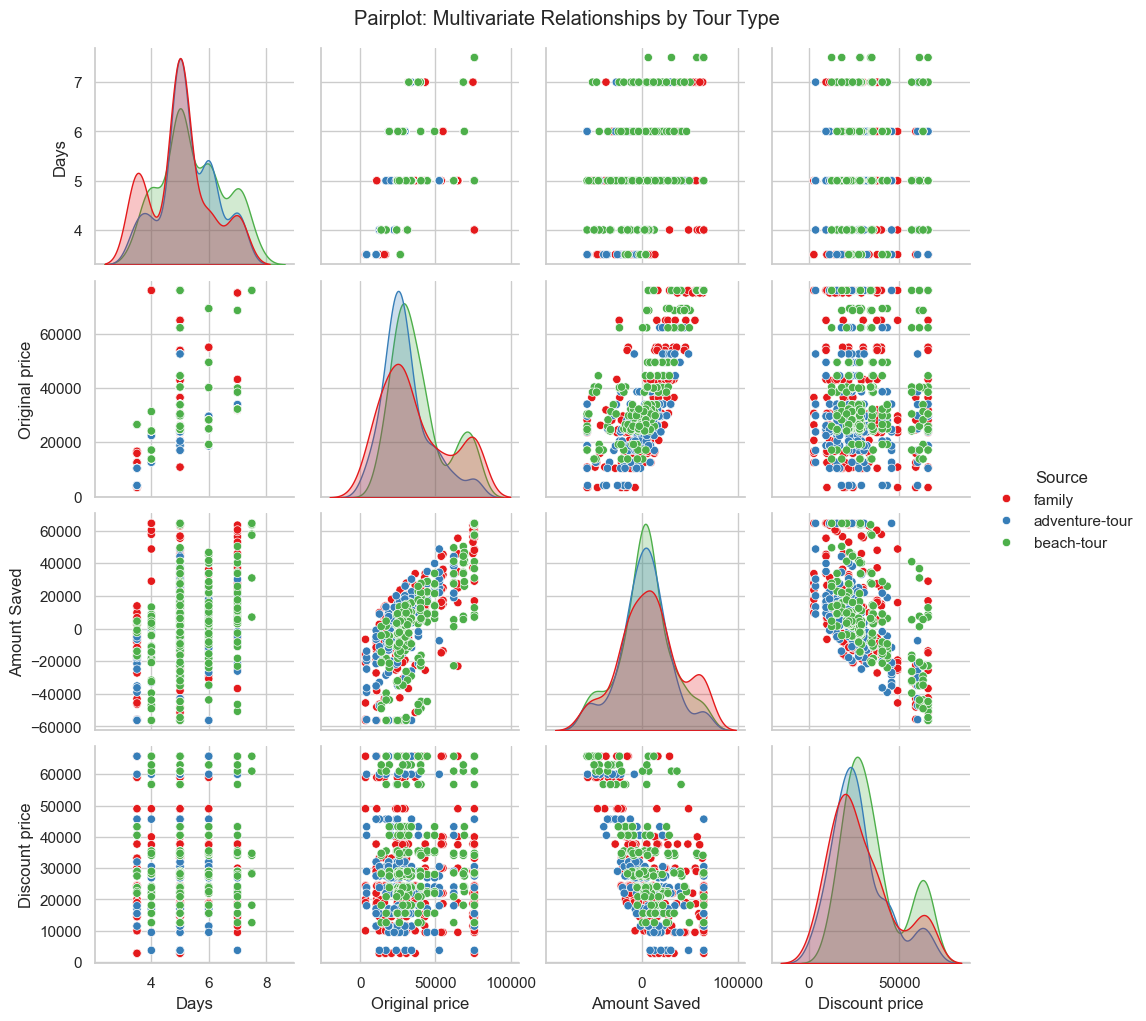

In [65]:
plt.figure(figsize=(15, 8))
sns.pairplot(df[['Days', 'Original price', 'Amount Saved', 'Discount price', 'Source']], hue='Source', palette='Set1')
plt.suptitle('Pairplot: Multivariate Relationships by Tour Type', y=1.02)
plt.show()

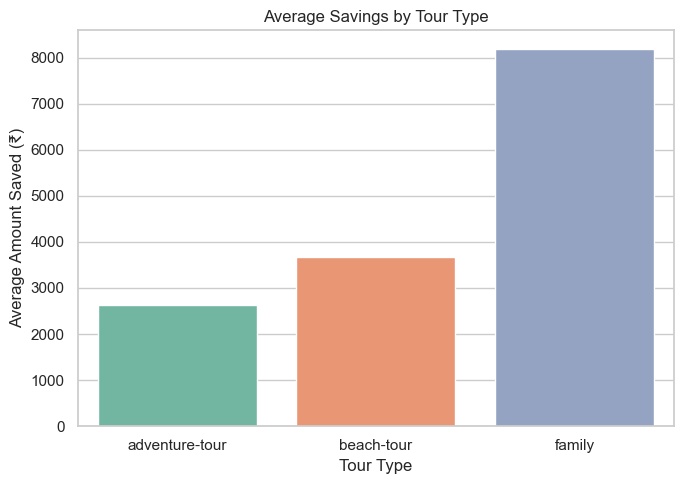

In [66]:
avg_savings = df.groupby('Source')['Amount Saved'].mean().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(data=avg_savings, x='Source', y='Amount Saved', palette='Set2')
plt.title('Average Savings by Tour Type')
plt.xlabel('Tour Type')
plt.ylabel('Average Amount Saved (₹)')
plt.tight_layout()
plt.show()


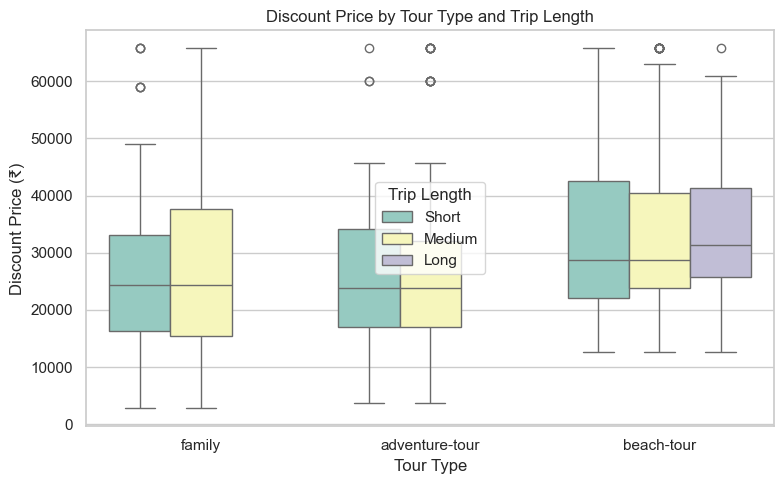

In [67]:
# Create a duration category
df['Trip Length'] = pd.cut(df['Days'], bins=[0, 4, 7, 100], labels=['Short', 'Medium', 'Long'])

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Source', y='Discount price', hue='Trip Length', palette='Set3')
plt.title('Discount Price by Tour Type and Trip Length')
plt.xlabel('Tour Type')
plt.ylabel('Discount Price (₹)')
plt.tight_layout()
plt.show()


#### This pairplot displays the multivariate relationships between Days, Original Price, Amount Saved, Discount Price, and Tour Type (Source). By using different colors for each tour type, we can observe the following patterns:

#### Tour Type-Based Distribution:

##### Beach tours (purple) appear most frequently across all variables.

##### Honeymoon packages (red) are the least common and mostly lie in the mid-price range with fewer discounts.

#### Days vs Price:

##### As the number of days increases, the original price of the package generally increases for most tour types.

##### some shorter trips also show high prices, indicating luxury or premium packages.

#### Amount Saved & Discount Patterns:

##### Family and adventure tours tend to offer higher discounts and show a wider spread in amount saved, suggesting flexible pricing.

##### Honeymoon tours have tighter pricing (less spread), showing less variation in savings.

#### Outlier Patterns:

##### Some outliers are visible in amount saved (negative savings or very high discounts), which may indicate incorrect pricing or special deals.



<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #28a745;">
  <h2 style="margin-top:0; color:#155724;">PROBLEM STATEMENT</h2>
  <p>This project analyzes travel package data from TravelTriangle to understand which tour types are popular, how prices and discounts vary, and how long trips usually last. The goal is to help travel companies improve their packages and make it easier for travelers to choose the best deals.
</p>
</div>      

# Analysis


<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:red; font-weight:bold; font-size:18px; font-style:italic;">Q1. Which type of tour package is most common?</p>
</div>


In [68]:
tour_counts = df['Source'].value_counts()
tour_counts


Source
beach-tour        192
family            184
adventure-tour    176
Name: count, dtype: int64

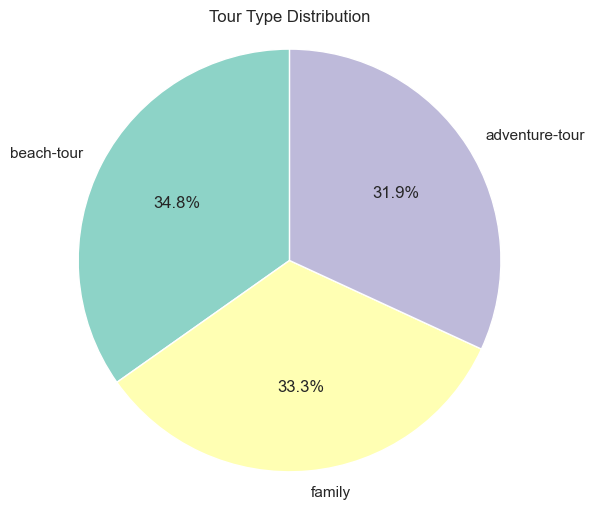

In [69]:
plt.figure(figsize=(6, 6))
colors = plt.cm.Set3.colors  
plt.pie(tour_counts, labels=tour_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Tour Type Distribution')
plt.axis('equal')  # Makes it a perfect circle
plt.show()


<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:b; font-weight:bold; font-size:18px; font-style:italic;"> Observation: Beach tours are the most offered packages, slightly more than family and adventure.All three tour types are almost evenly distributed, which shows a balanced offering for different customer interests.
</p>
</div>



<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:red; font-weight:bold; font-size:18px; font-style:italic;">2. What is the average discount percentage across packages?
</p>
</div>

In [70]:
avg_price = df.groupby('Source')['Original price'].mean().round(2).reset_index().sort_values(by='Original price', ascending=False)
print(avg_price)

           Source  Original price
1      beach-tour        38787.26
2          family        36432.28
0  adventure-tour        30356.04


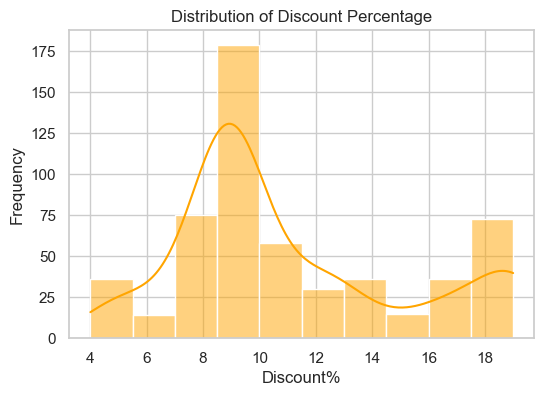

Average Discount%: 11.04


In [71]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Discount%'], bins=10, kde=True, color='orange')
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount%')
plt.ylabel('Frequency')
plt.show()

# Mean discount (also display in PPT)
print("Average Discount%:", round(df['Discount%'].mean(), 2))



<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:b; font-weight:bold; font-size:18px; font-style:italic;"> Observation: Beach tours are the most expensive on average, likely due to flight and resort costs.Adventure tours are the most budget-friendly, making them attractive for young or solo travelers.
Family tours fall in the middle, indicating moderate pricing for group experiences.

</p>
</div>



<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:red; font-weight:bold; font-size:18px; font-style:italic;">Q3. What is the average Discount Percentage?
</p>
</div>

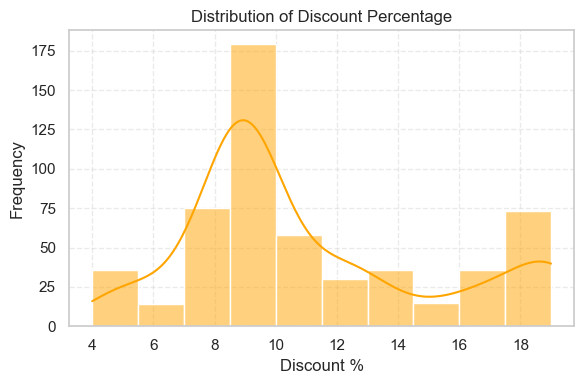

Average Discount %: 11.04


In [74]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Discount%'], bins=10, kde=True, color='orange')

plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount %')
plt.ylabel('Frequency')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# To print the average discount %
print("Average Discount %:", round(df['Discount%'].mean(), 2))

<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:red; font-weight:bold; font-size:18px; font-style:italic;">Q4. Does trip duration affect original price?
</p>
</div>

In [75]:
days_price = df[['Days', 'Original price']]
print(days_price.head())

   Days  Original price
0   5.0         75901.5
1   6.0         54990.0
2   3.5         12545.0
3   7.0         43157.0
4   3.5         15934.0


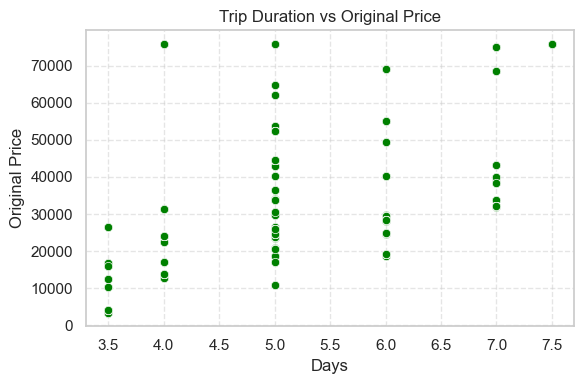

In [76]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Days', y='Original price', data=df, color='green')
plt.title('Trip Duration vs Original Price')
plt.xlabel('Days')
plt.ylabel('Original Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:b; font-weight:bold; font-size:18px; font-style:italic;"> Observation: There is a general upward trend — tour packages with more days tend to have higher original prices.
</p>
</div>


<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:red; font-weight:bold; font-size:18px; font-style:italic;">Q5. Which tour type gives the most savings?
</p>
</div>

In [77]:
avg_savings = df.groupby('Source')['Amount Saved'].mean().round(2).reset_index().sort_values(by='Amount Saved', ascending=False)
print(avg_savings)

           Source  Amount Saved
2          family       8181.81
1      beach-tour       3679.32
0  adventure-tour       2622.57


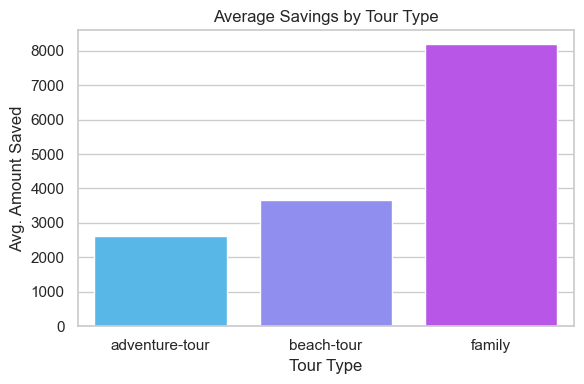

In [78]:
avg_savings = df.groupby('Source')['Amount Saved'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_savings, x='Source', y='Amount Saved', palette='cool')
plt.title('Average Savings by Tour Type')
plt.xlabel('Tour Type')
plt.ylabel('Avg. Amount Saved')
plt.tight_layout()
plt.show()


<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:b; font-weight:bold; font-size:18px; font-style:italic;"> Observation:Family packages offer the highest average savings, which may indicate more discounts or better deals in this category.
Beach-tour and adventure-tour packages have lower average savings, possibly because:
These tours include luxury or niche experiences (less discounted).
Or they have a consistent pricing structure with fewer extreme discounts.
</p>
</div>

<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:red; font-weight:bold; font-size:18px; font-style:italic;">Q6. What is the relation between discount % and savings?
</p>
</div>

In [79]:
avg_savings_by_discount = df.groupby('Discount%')['Amount Saved'].mean().reset_index()
avg_savings_by_discount

,Discount%,Amount Saved
0,4.0,33802.428571
1,5.0,-3965.206897
2,6.0,1665.446429
3,7.0,6632.266667
4,8.0,7552.450000
5,9.0,-979.178771
6,10.0,13449.020833
7,11.0,11758.056818
8,12.0,-1030.191667
9,13.0,13047.979167


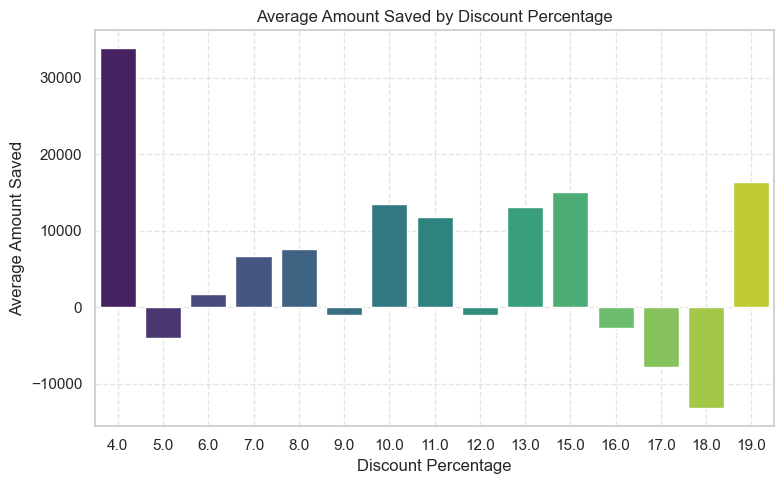

In [80]:
# Grouping to get average savings per discount %
avg_savings_by_discount = df.groupby('Discount%')['Amount Saved'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='Discount%', y='Amount Saved', data=avg_savings_by_discount, palette='viridis')
plt.title('Average Amount Saved by Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Average Amount Saved')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:b; font-weight:bold; font-size:18px; font-style:italic;">Observation: Highest savings seen at 4%, 10%, and 15% discount levels.
Some higher discounts (12–18%) show negative savings, indicating pricing errors or inconsistent data.
This suggests that higher discounts don’t always mean better deals  the pricing logic needs review.
</p>
</div>

<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:red; font-weight:bold; font-size:18px; font-style:italic;">Q7. Which location has the highest number of packages?
</p>
</div>

In [ ]:
top_locations = df['Location'].value_counts().head(10).reset_index()
top_locations.columns = ['Location', 'Count']
print(top_locations)

In [ ]:
top_locations = df['Location'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='cubehelix')
plt.title('Top 10 Most Frequent Tour Locations')
plt.xlabel('Number of Packages')
plt.ylabel('Location')
plt.tight_layout()
plt.show()



<div style="background-color:#33caff; padding:9px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:; font-weight:bold; font-size:18px; font-style:italic;">Observation:Mauritius tops the list with 81 tour packages, making it the most popular destination.Other frequently featured locations include Port Blair, Dubai, Kuta Ubud, and Manali.
Island and beach locations dominate the top spots, indicating high demand for coastal and tropical experiences.
</div>

<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:red; font-weight:bold; font-size:18px; font-style:italic;">Q8. Which tour type generates the most revenue (after discounts)?
</p>
</div>

In [81]:
revenue = df.groupby('Source')['Discount price'].sum().reset_index().sort_values(by='Discount price', ascending=False)
revenue

,Source,Discount price
1,beach-tour,6690072.0
2,family,5289824.0
0,adventure-tour,4849996.0


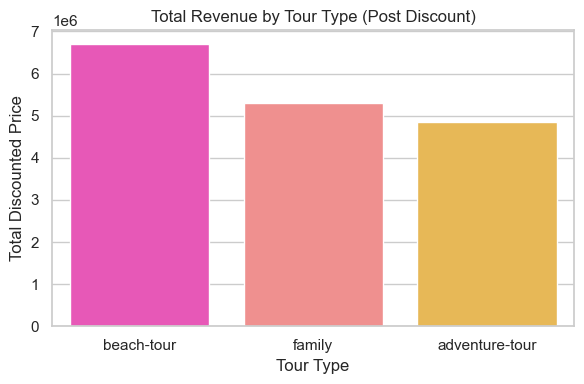

In [82]:
revenue = df.groupby('Source')['Discount price'].sum().reset_index().sort_values(by='Discount price', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=revenue, x='Source', y='Discount price', palette='spring')
plt.title('Total Revenue by Tour Type (Post Discount)')
plt.xlabel('Tour Type')
plt.ylabel('Total Discounted Price')
plt.tight_layout()
plt.show()


<div style="background-color:#33caff; padding:9px; border-radius:5px; border-left:6px solid #CD5C5C;">
<p style="color:; font-weight:bold; font-size:18px; font-style:italic;">Observation: Beach-tour packages generated the highest revenue (~₹66.9 Lakhs), showing strong customer preference.Family tours followed with ~₹52.9 Lakhs in sales.
Adventure tours contributed around ₹48.5 Lakhs.
This suggests beach destinations are the most profitable among all tour types.
</div>


<div style="background-color:#33caff; padding:15px; border-radius:5px; border-left:6px solid #CD5C5C;">
  <p style="color:red; font-weight:bold; font-size:18px; font-style:italic;">Q9.What are the most common highlight combinations offered in travel packages?
</p>
</div>

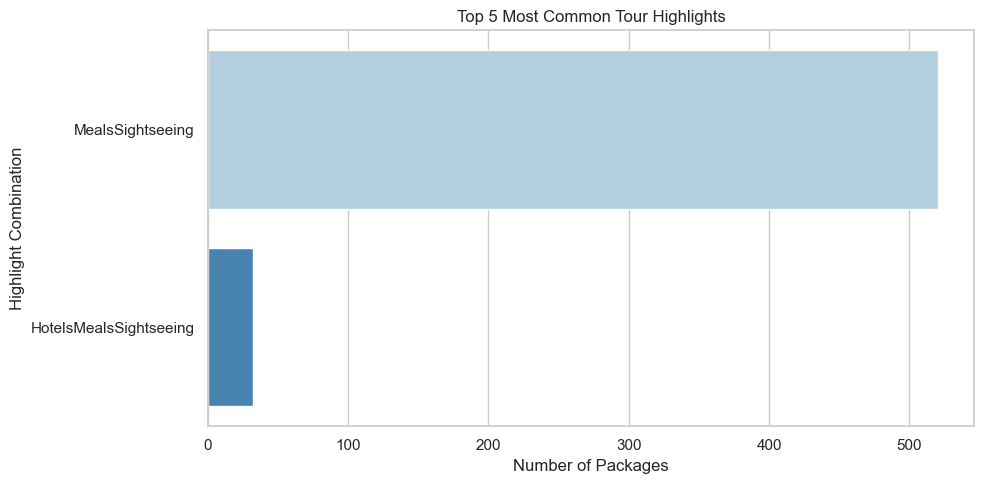

In [87]:
top_highlights = df['Highlights'].value_counts().head(5).reset_index()
top_highlights.columns = ['Highlights', 'Count']

plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Highlights', data=top_highlights, palette='Blues')
plt.title('Top 5 Most Common Tour Highlights')
plt.xlabel('Number of Packages')
plt.ylabel('Highlight Combination')
plt.tight_layout()
plt.show()


Most tour packages include Meals and Sightseeing as the main highlights. A few also include Hotels along with them.

<div style="background-color:#33caff; padding:9px; border-radius:5px; border-left:6px solid #CD5C5C;">
<p style="color:; font-weight:bold; font-size:18px; font-style:italic;">Most tour packages include Meals and Sightseeing as the main highlights. A few also include Hotels along with them.
</div>